## 3-1. Linear Regression의 cost 최소화 알고리즘의 원리

**Hypothesis and cost**  
$$H(x)=Wx+b$$ 
$$cost(W,b) = {1\over m}\sum_{i=1}^m(H(x^{(i)})-y^{(i)})^2$$


**Simplified hypothesis**  
$$H(x)=Wx$$ 
$$cost(W,b) = {1\over m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$$

**Gradient descent algorithm(경사 하강)**  
1. 개념
    - Minimize cost function  
    - Gradient descent is used many minimization problems  
    - For a given cost function, cost(W,b), it will find W,b to minimize cost  
    - It can be applied to more general function: cost(w1,w2,...)


2. How it works?  
    - Start with initial guesses  
        - Start at 0,0 (or any other value)  
        - Keeping changing W and b a little bit to try and reduce cost(W,b)
    - Each time you change the parameters, you select the gradient which reduces cost(W,b) the most possible  
    - Repeat  
    - Do so until you converge to a local minimum  
    - Has an interesting property  
        - Where you start can determine which minimum you end up  
        
        
=> <u>어디서 출발하든 항상 최소점에 도달할 수 있다.</u>(장점, but 예외는 있음)  

3. 경사도  
    - 미분

**Formal definition**
$$cost(W,b) = {1\over m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$$
=>
$$cost(W,b) = {1\over 2m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$$
=>
$$W := W - \alpha{\delta \over \delta W}cost(W)$$  
<center>(미분 : 한 점에서 기울기)</center>  
=>
$$W := W - \alpha{\delta \over \delta W}{1\over 2m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})^2$$
=>
$$W := W - \alpha{1\over 2m}\sum_{i=1}^m2(Wx^{(i)}-y^{(i)})x^{(i)}$$
=>
$$W := W - \alpha{1\over m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})x^{(i)}$$

**Gradient descent algorithm**
$$W := W - \alpha{1\over m}\sum_{i=1}^m(Wx^{(i)}-y^{(i)})x^{(i)}$$

- <u>cost function이 convex function이여야 gradient descent algorithm 사용 가능</u>



<img src='https://qph.fs.quoracdn.net/main-qimg-2f62803cd5ba745b6ae51aae6e6c165e.webp'>
<center> 그림: convex function </center>

## 3-2. Linear Regression 의 cost 최소화의 TensorFlow 구현

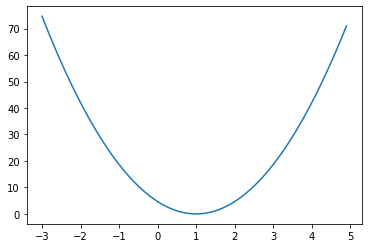

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1,2,3]
Y = [1,2,3]

W = tf.placeholder(tf.float32) 

# Our hypothesis for linear model X * W
hypothesis = X * W # features들을 가로로 놓기 위해

# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variables for plotting cost function
W_history = []
cost_history = []

# Launch the graph in a session.
with tf.Session() as sess:
    for i in range(-30, 50):
        curr_W = i * 0.1 # 대략 -3 ~ 5로 0.1 간격으로 움직이겠다
        curr_cost = sess.run(cost, feed_dict={W: curr_W})

        W_history.append(curr_W)
        cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show() # y축 : cost(W), x축 : W

- convex function  
- 최적화하는 값은 대략 1  
- 최적화하는 값을 찾기 위해 미분을 이용(Gradient descent 이용)  
- 1을 기준으로 오른쪽 기울기는 +, 왼쪽은 -

In [3]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Try to find values for W and b to compute y_data = W * x_data
# We know that W should be 1
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name="weight")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer()) # global_variables : 전역 변수

    for step in range(21):
        _, cost_val, W_val = sess.run(
            [update, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        print(step, cost_val, W_val)

0 6.8665643 [0.3530584]
1 1.9531559 [0.65496445]
2 0.55556446 [0.81598103]
3 0.15802719 [0.90185654]
4 0.04494996 [0.9476568]
5 0.012785784 [0.9720836]
6 0.003636841 [0.98511124]
7 0.0010344847 [0.99205935]
8 0.00029424974 [0.995765]
9 8.369887e-05 [0.99774134]
10 2.3806637e-05 [0.9987954]
11 6.772017e-06 [0.9993576]
12 1.9260958e-06 [0.9996574]
13 5.477728e-07 [0.99981725]
14 1.5589518e-07 [0.99990255]
15 4.4308663e-08 [0.999948]
16 1.2606658e-08 [0.9999723]
17 3.5881709e-09 [0.9999852]
18 1.0196951e-09 [0.99999213]
19 2.8887825e-10 [0.9999958]
20 8.02487e-11 [0.99999774]


In [4]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, W_val = sess.run([train, W])
        print(step, W_val)


0 1.2666664
1 1.0177778
2 1.0011852
3 1.000079
4 1.0000052
5 1.0000004
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0
100 1.0


- 시간이 지날수록 W가 1로 수렴

In [5]:
# This is optional
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

# Linear model
hypothesis = X * W

# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Get gradients
gvs = optimizer.compute_gradients(cost,[W])

# Optional: modify gradient if necessary
# gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]

# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        gradient_val, gvs_val, _ = sess.run([gradient, gvs, apply_gradients])
        print(step, gradient_val, gvs_val)


0 37.333332 [(37.333336, 4.6266665)]
1 33.84889 [(33.84889, 4.2881775)]
2 30.689657 [(30.689657, 3.9812808)]
3 27.825287 [(27.825287, 3.703028)]
4 25.228262 [(25.228262, 3.4507453)]
5 22.873621 [(22.873623, 3.2220092)]
6 20.738752 [(20.73875, 3.0146217)]
7 18.803137 [(18.803137, 2.8265903)]
8 17.048176 [(17.048176, 2.6561086)]
9 15.457013 [(15.457014, 2.5015385)]
10 14.014359 [(14.01436, 2.361395)]
11 12.706352 [(12.706352, 2.2343314)]
12 11.520427 [(11.520427, 2.119127)]
13 10.445186 [(10.445185, 2.0146751)]
14 9.470302 [(9.470302, 1.9199722)]
15 8.586407 [(8.586407, 1.8341081)]
16 7.785009 [(7.785009, 1.756258)]
17 7.0584083 [(7.0584083, 1.685674)]
18 6.399624 [(6.399624, 1.6216778)]
19 5.8023257 [(5.8023252, 1.5636545)]
20 5.260776 [(5.260776, 1.5110468)]
21 4.7697697 [(4.7697697, 1.4633491)]
22 4.324591 [(4.324591, 1.4201032)]
23 3.9209633 [(3.9209635, 1.3808936)]
24 3.5550067 [(3.5550067, 1.3453435)]
25 3.2232056 [(3.2232056, 1.3131114)]
26 2.9223735 [(2.9223735, 1.2838877)]
27 2.